# Content Churn for Bank Customers 

- **RowNumber** corresponds to the record (row) number and has no effect on the output. 
- **CustomerId** contains random values and has no effect on customer leaving the bank. 
- **Surname** the surname of a customer has no impact on their decision to leave the bank. 
- **CreditScore** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. 
- **Geography** a customers location can affect their decision to leave the bank. - - **Gender** its interesting to explore whether gender plays a role in a customer leaving the bank. 
- **Age** this is certainly relevant, since older customers are less likely to leave their bank than younger ones. 
- **Tenure** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
- **Balance** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. 
- **NumOfProducts** refers to the number of products that a customer has purchased through the bank. 
- **HasCrCard** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. 
- **IsActiveMember** active customers are less likely to leave the bank. 
- **EstimatedSalary** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. 
- **Exited** whether or not the customer left the bank.

It is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

##Data Setup & Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
customer_churn = fetch_openml(name='Churn-for-Bank-Customers', version=1)

In [3]:
df = customer_churn['data']
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [4]:
df.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

This dataset has 3 features listed as objects and the rest are numerical features (including the target variable 'Exited')

In [5]:
df.isna().sum()/df.shape[0]*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

There are no missing values present in this dataset

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


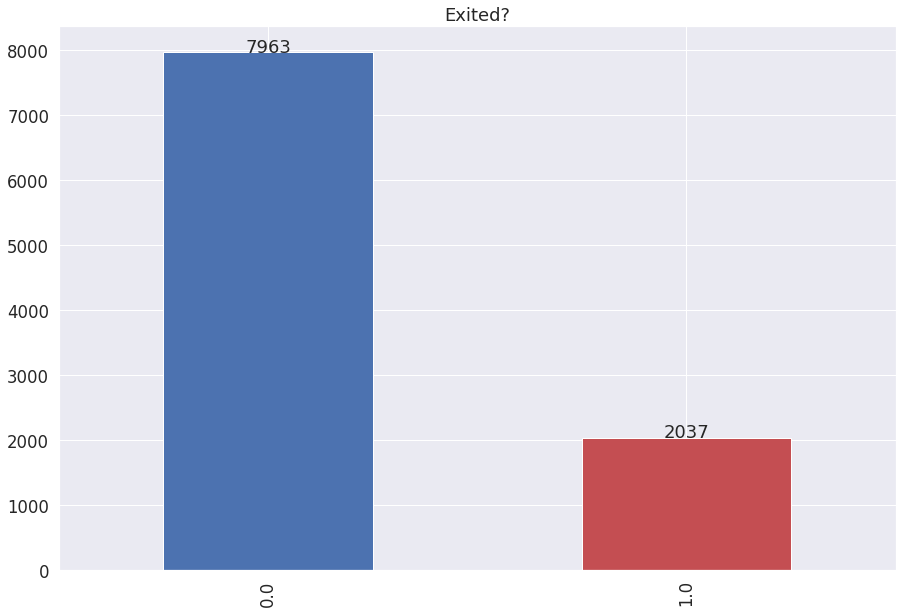

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

df["Exited"].value_counts().plot(kind='bar', color=['C0', 'C3'], figsize=(15, 10))
# 'C7' is Grey
# plt.xlabel("Loan Approval", labelpad=14)
# plt.ylabel("Count of Records", labelpad=14)
plt.title("Exited?")
df["Exited"].value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df["Exited"].value_counts().index, df["Exited"].value_counts().values)

**Outlier Removal**

The XGBoost is a robust method to build a classifier and it does not assume a normal distribution of numerical features in the dataset and due to the way it builds decision trees, other transformations such as scaling is also not neccesary. It can however be sensitive to outliers and it is best to filter out these outliers prior to building the XGBoost based predictive model

In [8]:
def remove_outlier(data):
  df_temp = data.copy()
  num = list(df_temp.drop('Exited',axis=1).select_dtypes(include=['int64','float64']).columns)
  for col in num:
    Q1 = np.percentile(df_temp[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_temp[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    df_temp = df_temp[df_temp[col] >= (Q1-1.5*IQR)]
    df_temp = df_temp[df_temp[col] <= (Q3+1.5*IQR)]
  return df_temp

df = remove_outlier(df)

Identifier columns such as CustomerId, RowNumber and Surname are dropped due to their insignificance in predicting the target variable

In [9]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


## Feature Importance & Selcection: Mutual Information

In [10]:
X = df.copy()
y = X.pop("Exited")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [11]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

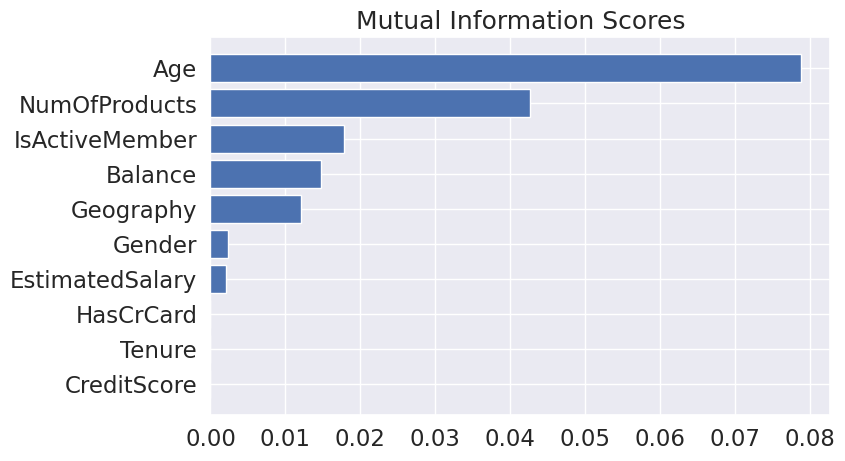

In [12]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [13]:
mi_scores

Age                0.078734
NumOfProducts      0.042625
IsActiveMember     0.017756
Balance            0.014745
Geography          0.012054
Gender             0.002332
EstimatedSalary    0.002132
CreditScore        0.000000
Tenure             0.000000
HasCrCard          0.000000
Name: MI Scores, dtype: float64

Drop features with low valued Mutual Information Scores:

In [14]:
df = df.drop(['CreditScore','Tenure'], axis=1)
df.head()

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,Spain,Female,41.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,France,Female,42.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,France,Female,39.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,Spain,Female,43.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [15]:
df = pd.get_dummies(df, columns=['Gender','Geography'], drop_first=False)
df.head()

,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,42.0,0.00,1.0,1.0,1.0,101348.88,1.0,1,0,1,0,0
1,41.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1,0,0,0,1
2,42.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1,0,1,0,0
3,39.0,0.00,2.0,0.0,0.0,93826.63,0.0,1,0,1,0,0
4,43.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1,0,0,0,1


##Build XGBoost Classifier & Results Analysis

In [16]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
enable_categorical=False

x_train, x_test, y_train, y_test = train_test_split(df.drop(['Exited'],axis=1), df['Exited'], test_size=0.2, random_state=0, shuffle=True, stratify=df['Exited'])

weights = np.zeros(len(y_train))
weights[y_train == 1.0] = y_train[y_train == 0.0].shape[0]/y_train[y_train == 1.0].shape[0]
weights[y_train == 0.0] = y_train[y_train == 0.0].shape[0]/y_train[y_train == 0.0].shape[0]


dtrain = xgb.DMatrix(x_train, label=y_train, weight=weights)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {'silent':1,
          'eta':0.5,
          'objective': 'binary:logistic',
          'max_depth':8}

model = xgb.train(params,dtrain,15)
predictions = (model.predict(dtest) > 0.5).astype(int)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
print('accuracy =', accuracy_score(y_test, predictions))
print('precision =', precision_score(y_test, predictions, average='weighted'))
print('recall =', recall_score(y_test, predictions, average='weighted'))

accuracy = 0.8019853709508882
precision = 0.824219584509251
recall = 0.8019853709508882


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1536
         1.0       0.50      0.64      0.56       378

    accuracy                           0.80      1914
   macro avg       0.70      0.74      0.72      1914
weighted avg       0.82      0.80      0.81      1914



In the case of churn analysis, the metric to keep an eye on is the recall metric. In this case, the Recall reveals the proportion of churns identified correctly by the total number of churns. Recall is more important because it's preferable to have a model that does not miss any churns but sometimes classify a non-churns as churns, than a model that does not classify non-churns as churns but misses a lot of churns. This has to do with the implications of the marketing strategy to minimize customer churns. It causes more harm should customers who are more likely to churn be neglected than it is to try to court existing customers to keep using the company's product or services even though they are unlikely to churn. Recall is more important because it's preferable to have a model that does not miss any churns but sometimes classify a non-churns as churns, than a model that does not classify non-churns as churns but misses a lot of churns. In other words, we prefer to be incorrect when classifying a non-churning costumer than when classifying a churning customer. This model has a recall value of 64% and a precision value of 50% when it comes to correctly labelling customers who are likely to churn, even though it is apparent that the metrics of this model could be improved, it is clear that the model is more successful in preventing churn customers from being neglected than it is at correctly classifying customers that are actually about to churn